### Treść zadania

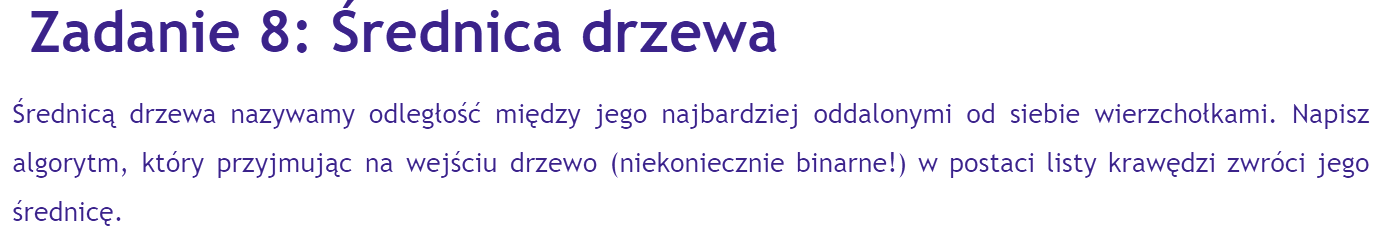

### Omówienie algorytmu

###### Omówienie implementacji #1:
Bardzo ważna jest jedna obserwacja, jako korzeń drzewa może zostać uznany dowolny wierzchołek (nawet ze środka drzewa), bo średnica nie zależy od wyboru korzenia drzewa i nie musi przechodzić przez korzeń. Algorytm działa bardzo podobnie do tego, którego implementacja znajduje się w pliku z zadaniem 6. z 6. ćwiczeń, a jedyną znaczącą modyfikacją jest to, że zamiast szukania takiej ścieżki, dla której suma wartości w wierzchołkach jest maksymalna, szukamy takiej ścieżki, na której znajduje się najwięcej krawędzi. Stąd muszą wynikać pewne modyfikacje w implementacji. W szczególności, konieczne jest stworzenie tablicy do zapamiętywania odwiedzonych wierzchołków. Dla każdego wierzchołka w funkcji rekurencyjnej musimy zaznaczyć, że go odwiedzamy, a następnie znaleźć długości dwóch najdłuższych ścieżek, które znajdują się w poddrzewach jego dzieci. Jeżeli istnieją 2 takie ścieżki (rozpatrywany obecnie wierzchołek ma przynajmniej dwójkę dzieci), sprawdzamy, czy po połączeniu te 2 ścieżki (+ 2 krawędzie, którymi je łączymy - potrzebne są 2, bo 1. łączy 1 dziecko z obecnym wierzchołkiem a 2. drugie dziecko), utworzą najdłuższą ścieżkę i, jeżeli tak, to aktualizujemy zapamiętaną długość najdłuższej ścieżki. Jeżeli natomiast mamy tylko jedną ścieżkę, to sprawdzamy, czy ta ścieżka po dodaniu 1 krawędzi (łączącej tę ścieżkę z bieżącym wierzchołkiem), będzie najdłuższa. Oczywiście obie opisane operacje wykonujemy zawsze tylko, jeżeli nie jesteśmy w wierzchołkach, które są liśćmi, ponieważ dla nich ścieżka ma długość równą 0. Jeżeli jesteśmy jednak w innych wierzchołkach niż liście, to bieżąca ścieżka, która nie zawraca (prosta ścieżka), będzie miała długość o 1 większą od najdłuższej w wierzchołkach dzieci.

### Złożoność

##### Implementacja #1 i #2 (obie tak samo):
###### Obliczeniowa:
$ O(V + E) = | E = V - 1 | = O(V) $, gdzie $ V $ - liczba wierzchołków, $ E $ - liczba krawędzi, <br>
$ E = V - 1 $, bo to drzewo, więc nie ma cykli,
###### Pamięciowa:
$ O(V + E) = O(V) $, gdzie $ V $ - liczba wierzchołków (ponieważ tworzymy graf, na podstawie listy krawędzi, musimy to uwzględnić w złożoności, ale skoro jest to drzewo, otrzymujemy $ E = V - 1 $, więc złożoność pamięciowa wynosi $ O(V) $),

### Implementacja #1 (gorsza)

In [1]:
def undirected_graph_list(E: 'array of edges'):
    # Find a number of vertices in a graph
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
        G[edge[1]].append(edge[0])
    return G


def tree_diameter(E: 'array of edges'):
    # Create a graph representation using adjacency lists
    G = undirected_graph_list(E)
    # Look for the longest path
    return max_path(G)
        
        
def max_path(G: 'graph represented using adjacency lists'):
    n = len(G)
    global_max = 0
    visited = [False] * n
    
    def recur(u):
        nonlocal global_max
        visited[u] = True
        
        max_paths = [-1, -1]
        for v in G[u]:
            if not visited[v]:
                v_max = recur(v)
                update_max_paths(max_paths, v_max)
        
        # If entered a node which has only one node connected
        # (is a leaf), store length of the current path equal to 0
        if len(G[u]) == 1:
            curr_max = 0
        # ELse, increase a length of the longest path by 1
        else:
            curr_max = max(max_paths) + 1
            
        # If found both paths, compare the length of them both increased by 2
        # with the globally longest path
        if max_paths[0] >= 0 and max_paths[1] >= 0:
            global_max = max(global_max, sum(max_paths) + 2)
        # Else, we must have found only one path (or no paths), so the other one is -1
        # Therefore, we have to choose the longest one and compare its length increased
        # by 1 to the global max
        else:
            global_max = max(global_max, max(max_paths) + 1)

        return curr_max
        
    recur(0)  # This doesn't matter where we start
    
    return global_max


def update_max_paths(max_paths, child_max):
    # Try to replace the lower value at first (we want to
    # maximize a sum of both paths' values so we have to get rid
    # of the lower one at first)
    if max_paths[0] > max_paths[1] and child_max > max_paths[1]:
        max_paths[1] = child_max
    elif child_max > max_paths[0]:
        max_paths[0] = child_max

###### Kilka testów

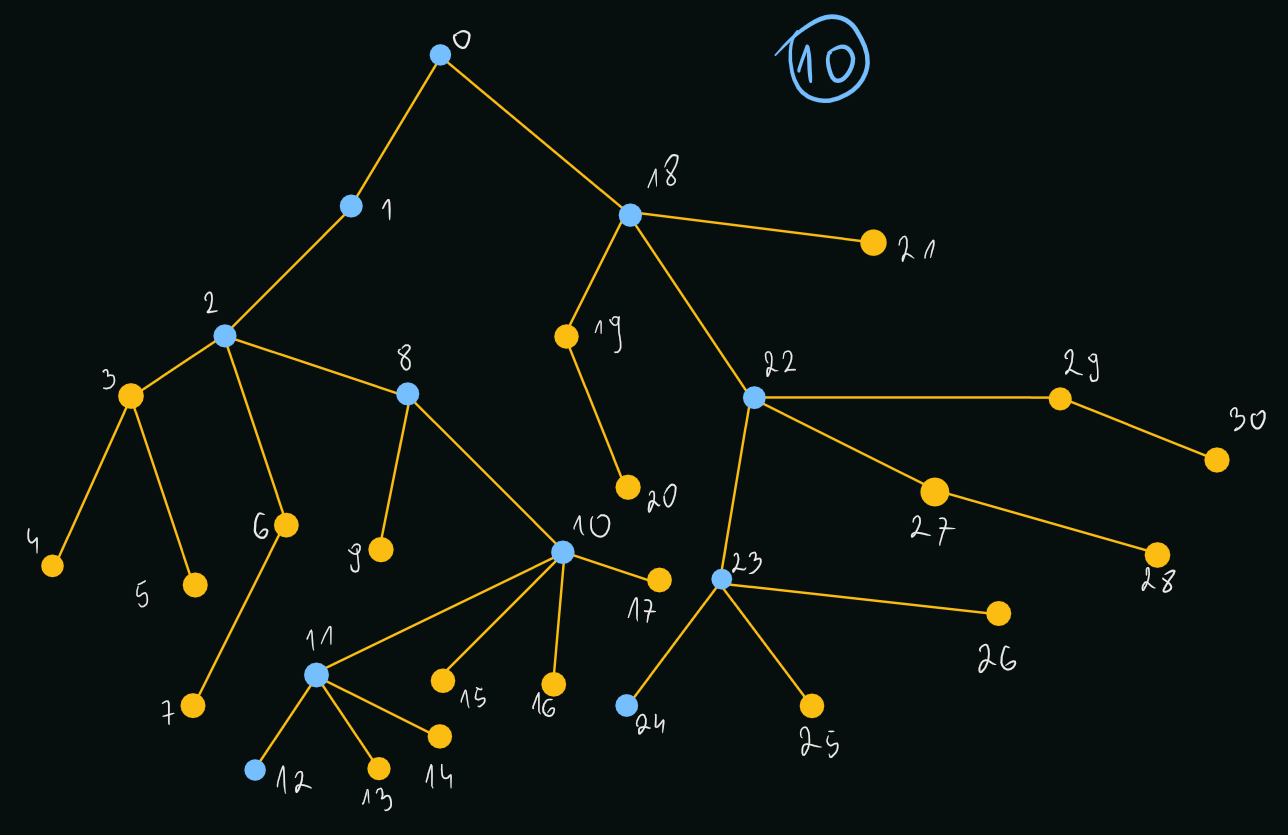

In [2]:
E = [(0, 1), (1, 2), (2, 3), (3, 4), (3, 5), (2, 6), (6, 7), (2, 8), (8, 9), (8, 10), (10, 17),
     (10, 16), (10, 15), (10, 11), (11, 12), (11, 13), (11, 14), (0, 18), (18, 21), (18, 19),
     (19, 20), (18, 22), (22, 23), (23, 24), (23, 25), (23, 26), (28, 27), (22, 27), (22, 29), (29, 30)]

print(tree_diameter(E))

10


In [3]:
E = [(0, 1)]

print(tree_diameter(E))

1


In [4]:
E = [(0, 1), (0, 2)]

print(tree_diameter(E))

2


### Implementacja #2 (lepsza)
##### Z użyciem algorytmu DFS

In [5]:
def undirected_graph_list(E: 'array of edges', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
        G[edge[1]].append(edge[0])
    return G
        

def dfs(G: 'graph represented using adjacency lists',
        i: 'begin vertex'):
    n = len(G)
    dist = [-1] * n
    dist[i] = 0
    
    def dfs_visit(i):
        for j in G[i]:
            if dist[j] < 0:
                dist[j] = dist[i] + 1
                dfs_visit(j)
    
    dfs_visit(i)
    
    max_i = 0
    # Look for the max distance
    for i in range(1, n):
        if dist[i] > dist[max_i]:
            max_i = i
    
    return max_i, dist[max_i]
    
    
def diameter(G: 'graph represented using adjacency lists'):
    begin_vertex, _ = dfs(G, 0)
    _, diam = dfs(G, begin_vertex)
    return diam

    
def tree_diameter(E: 'array of graph edges'):
    # Find a number of vertices in a tree
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    # Create a graph representation with adjacency lists
    G = undirected_graph_list(E, n)
    return diameter(G)

###### Kilka testów

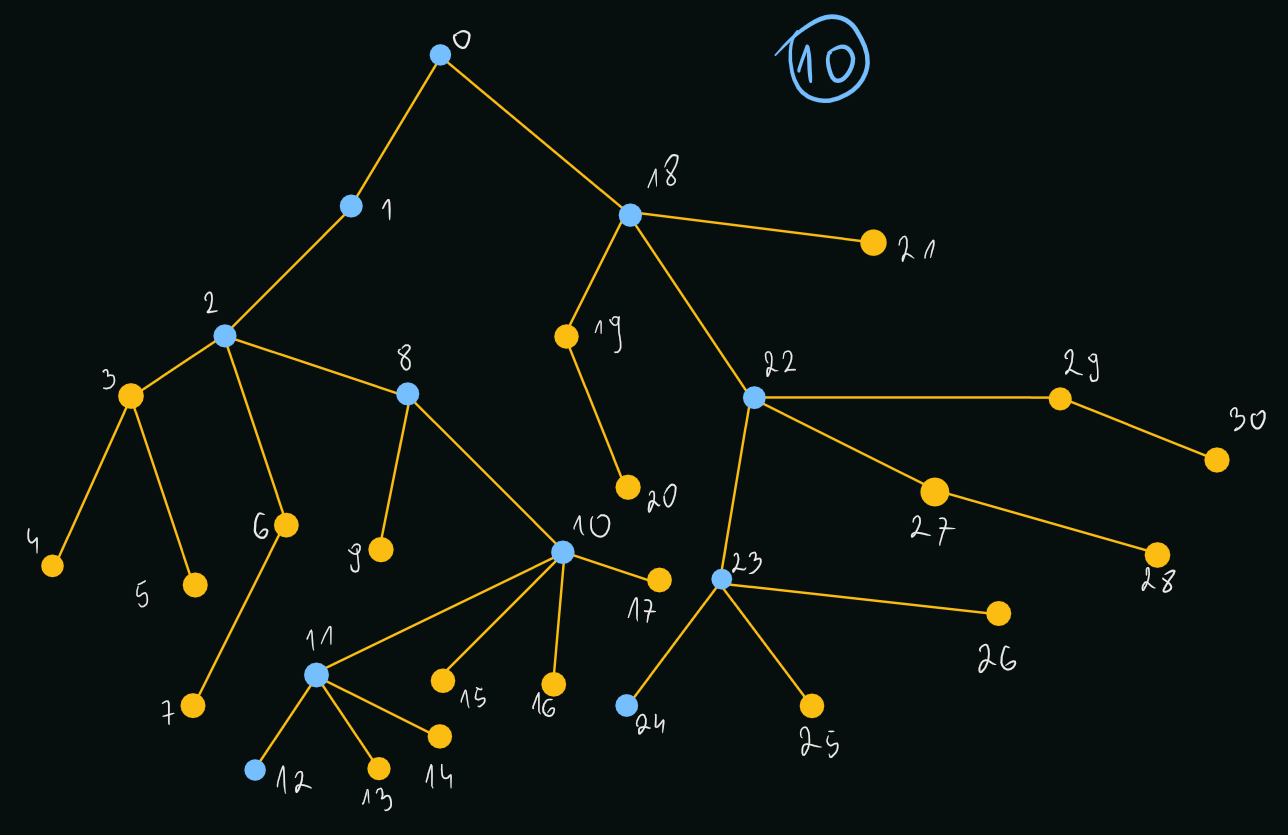

In [6]:
E = [(0, 1), (1, 2), (2, 3), (3, 4), (3, 5), (2, 6), (6, 7), (2, 8), (8, 9), (8, 10), (10, 17),
     (10, 16), (10, 15), (10, 11), (11, 12), (11, 13), (11, 14), (0, 18), (18, 21), (18, 19),
     (19, 20), (18, 22), (22, 23), (23, 24), (23, 25), (23, 26), (28, 27), (22, 27), (22, 29), (29, 30)]

print(tree_diameter(E))

10


In [7]:
E = [(0, 1)]

print(tree_diameter(E))

1


In [8]:
E = [(0, 1), (0, 2)]

print(tree_diameter(E))

2
